<a href="https://colab.research.google.com/github/Kaiaysez/Estimating-potting-probability-in-billiards/blob/main/Pool_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os # Iterate through directories and join paths
import cv2 # For doing image operations
import tensorflow as tf
from tensorflow import keras
import pickle
import random


"""Specifying data directory, formating images and visualizing images."""

DATADIR =  "/content/drive/MyDrive"
CATEGORIES = ["Missed","Potted"]

IMG_SIZE = 150 # Constant for resizing image

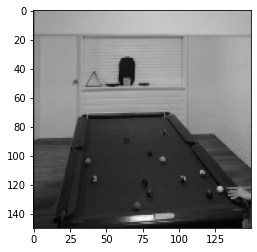

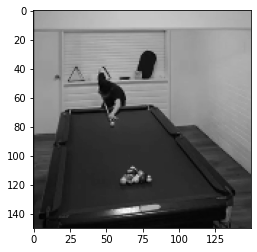

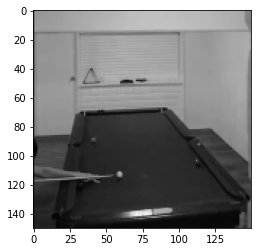

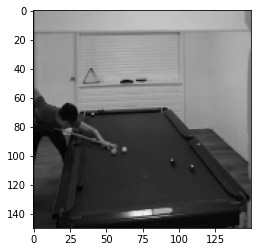

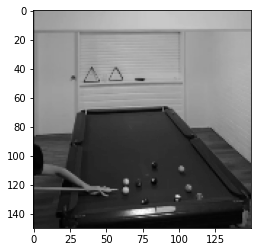

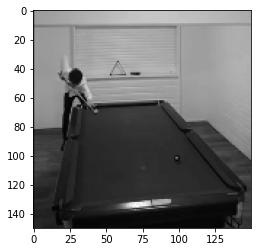

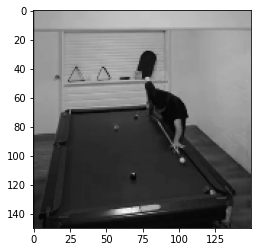

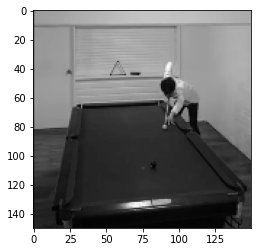

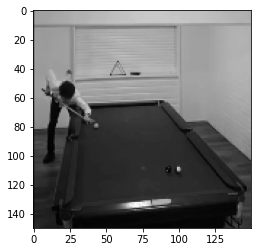

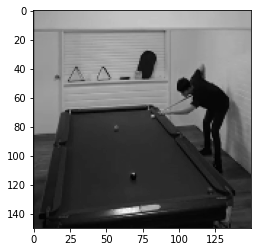

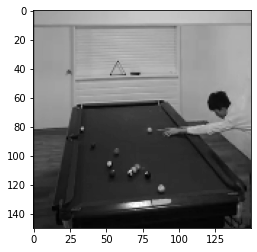

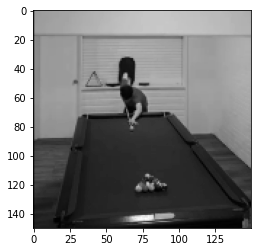

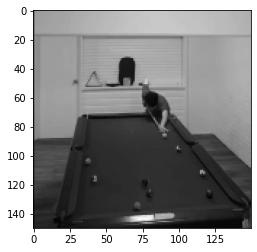

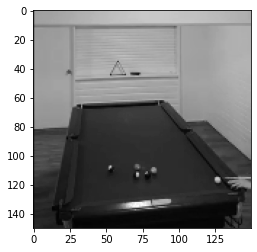

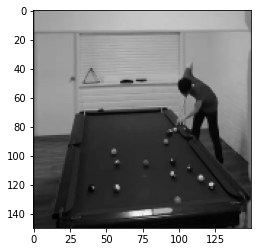

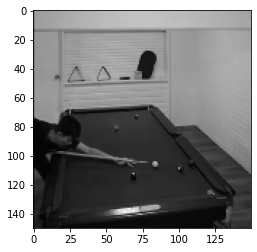

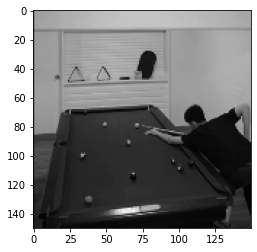

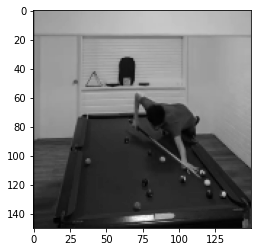

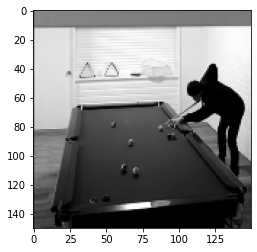

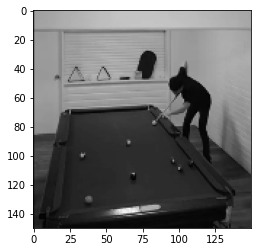

In [65]:
count = 20 # Number of pictures to display for exploratory visualization purposes
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
    for img in os.listdir(path): # For each image in the Miss/Success folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                # the images will be extremely blurry. I am guessing 
        plt.imshow(img_array, cmap = "gray") # Show the image represented by img_array
        plt.show()
        count = count - 1
        if count == 0:
            break
    break

In [66]:
training_data = [] # List containing [image,class] lists where image is a matrix, and class is 0 or 1

"""Appends properly formatted training data into training_data"""
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
        class_no = CATEGORIES.index(category) # The index of category in the list CATEGORIES
        for img in os.listdir(path): # For each image in the Miss/Success folder
            #img_array = cv2.imread(os.path.join(path,img))
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
            img_array = img_array[415:784,370:762] # Cropping the image
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                    # the images will be extremely blurry. I am guessing 
                                                                    # that the resizing is done via some sort of filter.
            training_data.append([new_array, class_no]) # Append training_data with a list containing the image, and the
                                                        # class it belongs to
            
create_training_data()
    

random.shuffle(training_data)

X = [] # features (every pixel is a feature, so we have 150x150 = 22500 features)
y = [] # labels
for images,labels in training_data:
    X.append(images)
    y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X = X/255
y = np.array(y)
# y = tf.one_hot(y, depth=2)

In [67]:
y.shape
#X.shape

(481,)

In [68]:

"""
model = keras.Sequential([
   keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(IMG_SIZE,IMG_SIZE,1)),
   keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
   keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2, strides=2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(units=128, activation='relu'),
   keras.layers.Dense(units=2, activation='softmax')
])

"""
"""
model = keras.Sequential([
   keras.layers.Conv2D(20, 3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),   
   #keras.layers.BatchNormaliza0tion(),
   keras.layers.MaxPool2D(3,1), # (Size,Stride)
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(40, 3, activation='relu'), # (No. of filters, kernel size)
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(80, 7, activation='relu'),
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,1),   
   keras.layers.Dropout(0.3),

   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(2, activation='softmax')
])

"""

""" VGG PERFORMS TERRIBLY
model = keras.Sequential([
   keras.layers.Conv2D(filters=50, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'), 
   keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 
 
   
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(64, activation='relu'),   
   keras.layers.Dense(2, activation='softmax')
])

"""

""" Alexnet is so-so, haven't tried tweaking it much
model = keras.Sequential([
   keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,3), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""
""" Trying to start off with a huuuggee kernel
model = keras.Sequential([
   #keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2,input_shape=(IMG_SIZE,IMG_SIZE,1)),

   keras.layers.Conv2D(filters=80, kernel_size=19, strides=4, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=1),

   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""
model = keras.Sequential([
   keras.layers.Conv2D(filters=30, kernel_size=7, strides=1, padding='same', input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=2,strides=2,input_shape=(IMG_SIZE,IMG_SIZE,1)),

   keras.layers.Conv2D(filters=60, kernel_size=5, strides=1, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=60, kernel_size=5, strides=1, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2),

   keras.layers.Conv2D(filters=100, kernel_size=3, padding='same', activation='relu'),
   keras.layers.Conv2D(filters=100, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   #keras.layers.Dropout(0.3),
   #keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer = "adam",
              #loss = keras.losses.BinaryCrossentropy(),  
              loss = keras.losses.SparseCategoricalCrossentropy(),           
              metrics = ["accuracy"])

model.fit(X,y, epochs = 2000, batch_size = 180)



Epoch 1/2000
3/3 [==============================] - 2s 551ms/step - loss: 2.7811 - accuracy: 0.5676
Epoch 2/2000
3/3 [==============================] - 2s 552ms/step - loss: 0.7031 - accuracy: 0.4220
Epoch 3/2000
3/3 [==============================] - 2s 554ms/step - loss: 0.6831 - accuracy: 0.5800
Epoch 4/2000
3/3 [==============================] - 2s 549ms/step - loss: 0.6786 - accuracy: 0.5800
Epoch 5/2000
3/3 [==============================] - 2s 552ms/step - loss: 0.6835 - accuracy: 0.5800
Epoch 6/2000
3/3 [==============================] - 2s 552ms/step - loss: 0.6783 - accuracy: 0.5800
Epoch 7/2000
3/3 [==============================] - 2s 551ms/step - loss: 0.6761 - accuracy: 0.5800
Epoch 8/2000
3/3 [==============================] - 2s 548ms/step - loss: 0.6757 - accuracy: 0.5800
Epoch 9/2000
3/3 [==============================] - 2s 550ms/step - loss: 0.6642 - accuracy: 0.5800
Epoch 10/2000
3/3 [==============================] - 2s 549ms/step - loss: 0.6496 - accuracy: 0.6029

KeyboardInterrupt: ignored

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 150, 150, 30)      1500      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 60)        45060     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 60)        90060     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 37, 37, 100)      

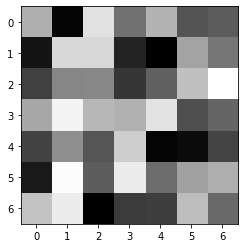

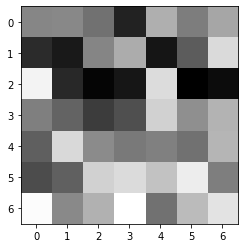

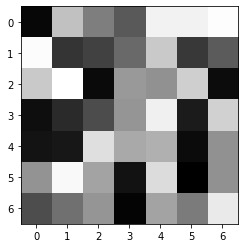

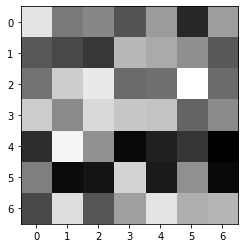

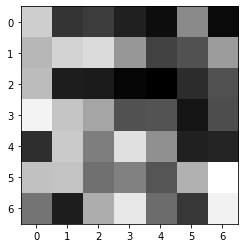

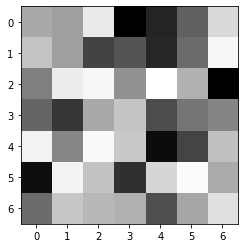

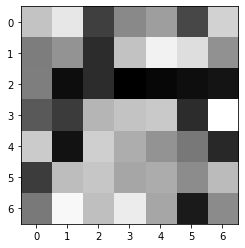

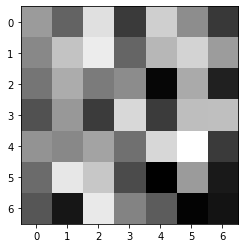

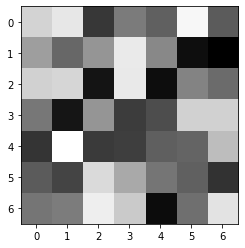

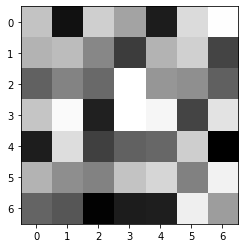

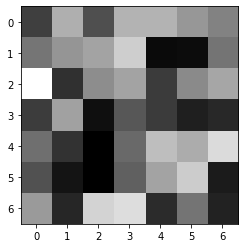

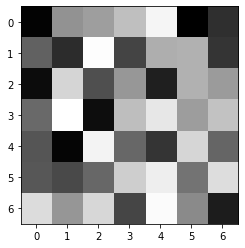

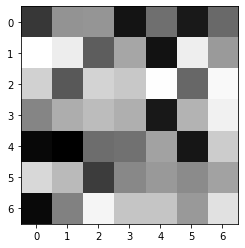

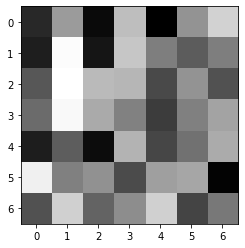

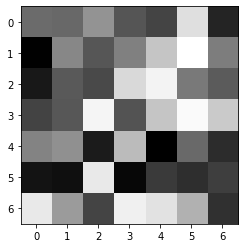

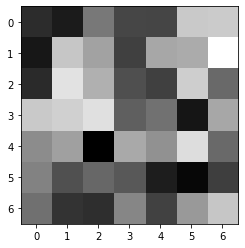

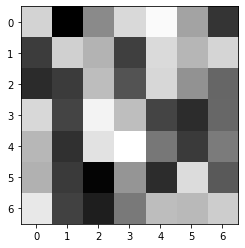

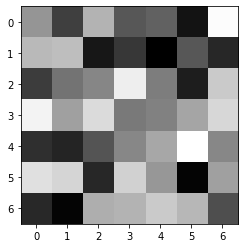

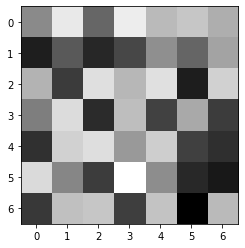

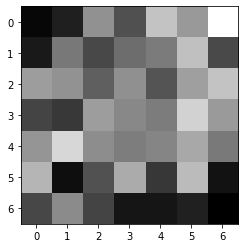

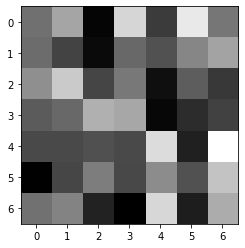

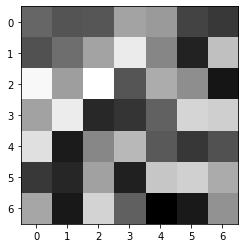

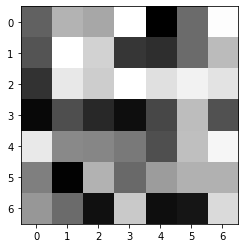

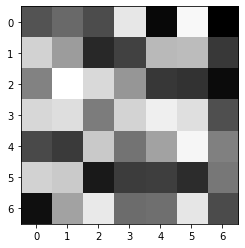

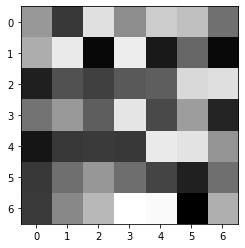

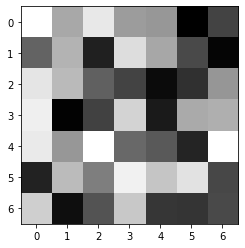

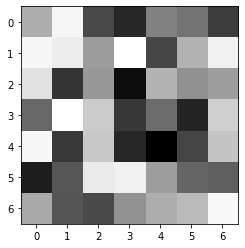

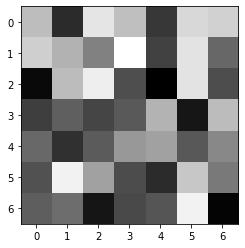

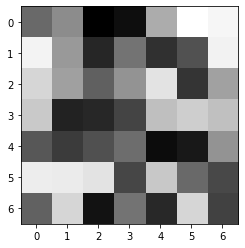

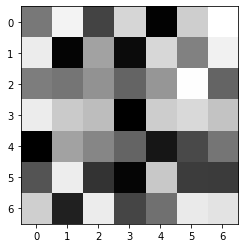

In [70]:
filt, bias = model.layers[0].get_weights()
for i in range(30):
    plt.imshow((filt[:,:,:,i]+bias[i]).reshape(7,7), cmap = "gray")
    plt.show()


In [ ]:
first_layer = keras.Model(inputs=model.inputs , outputs=model.layers[1].output)
image = load_img(" ", target_size=(150,150))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

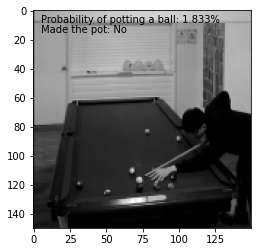

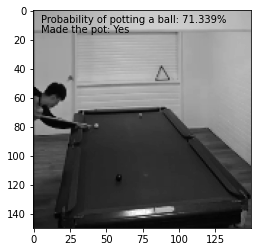

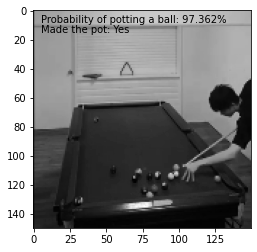

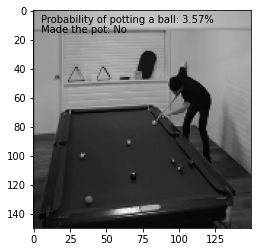

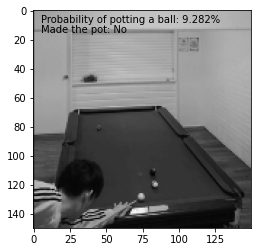

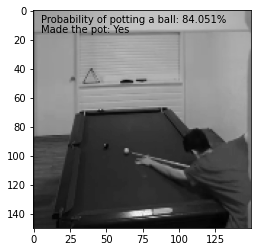

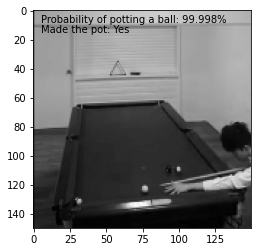

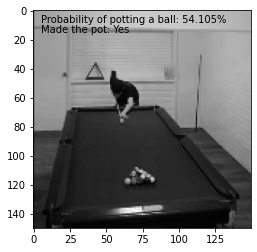

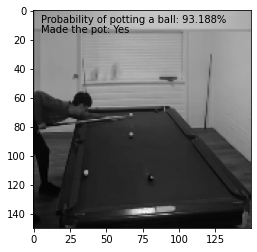

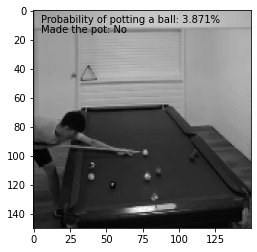

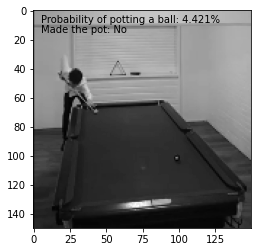

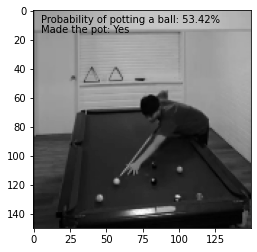

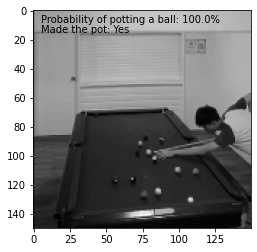

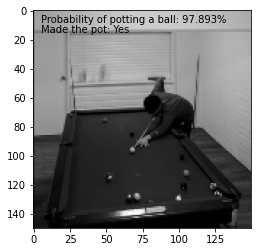

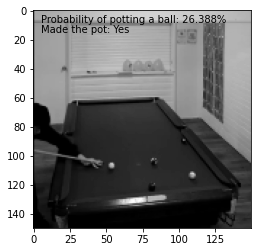

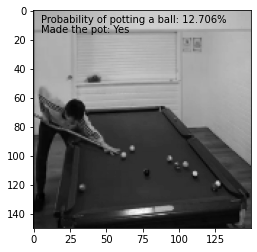

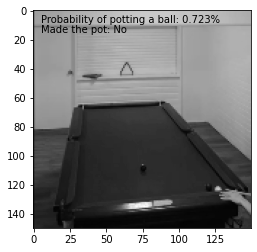

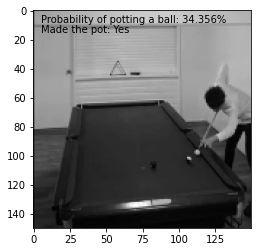

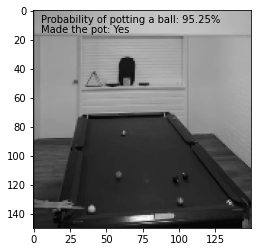

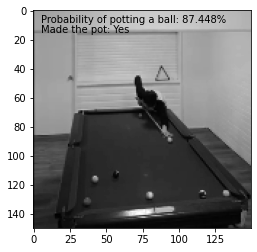

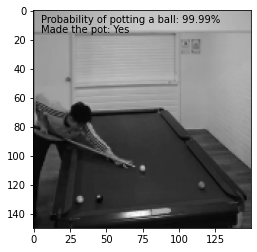

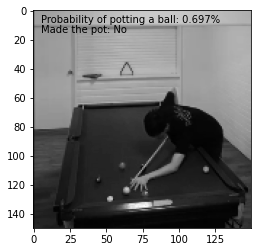

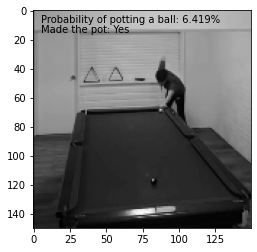

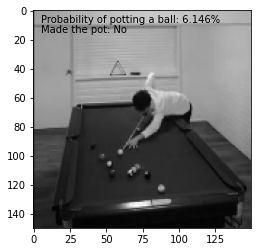

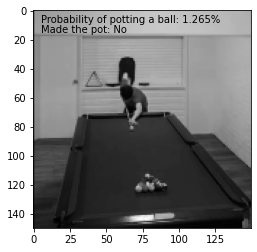

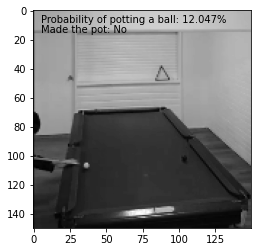

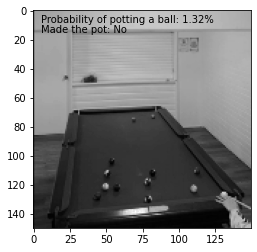

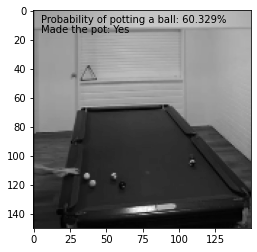

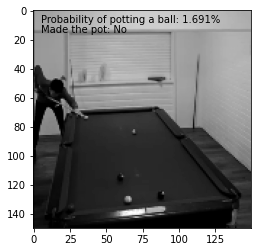

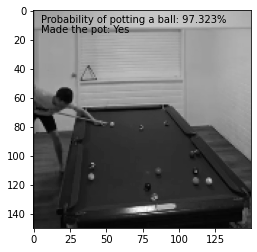

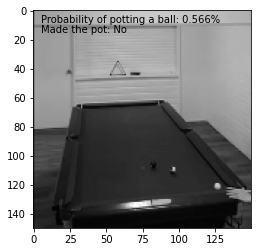

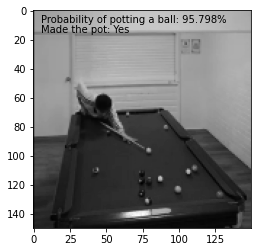

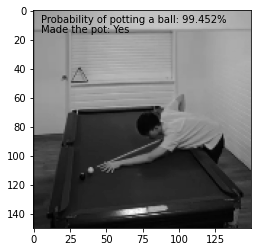

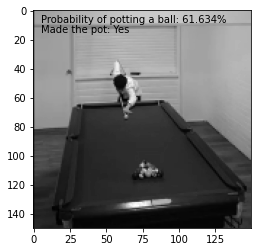

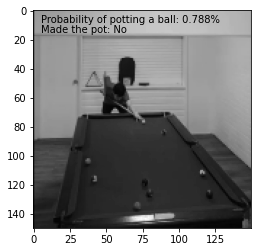

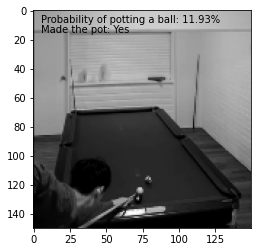

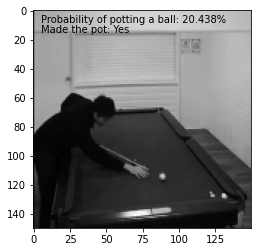

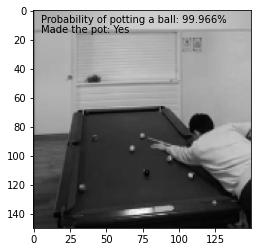

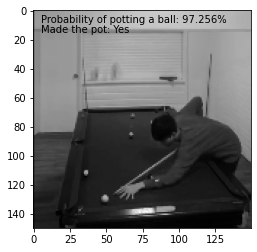

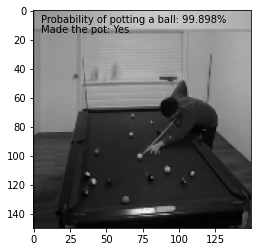

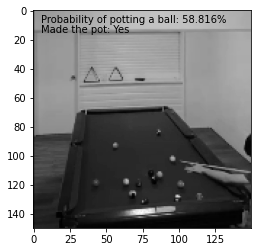

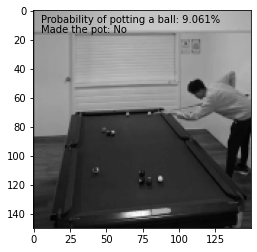

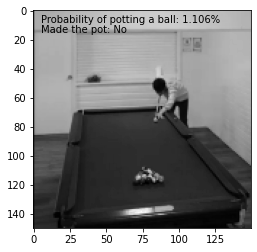

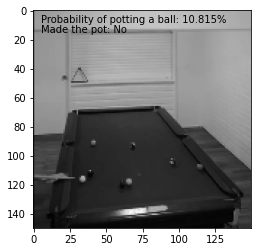

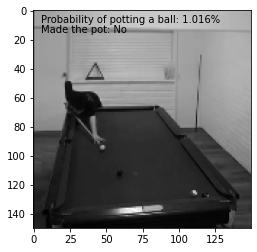

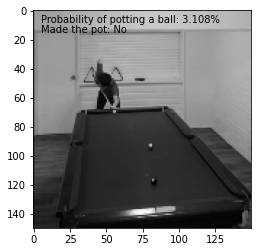

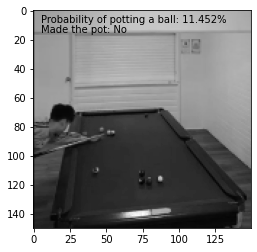

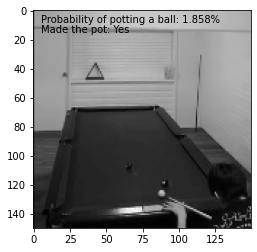

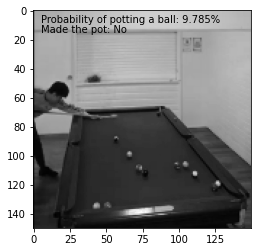

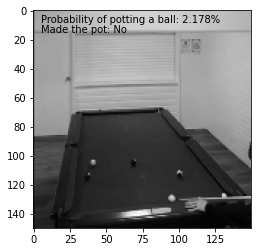

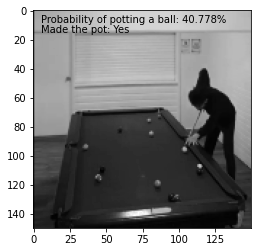

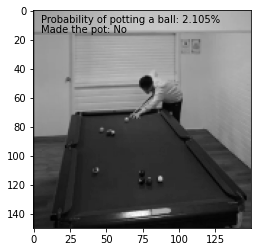

KeyboardInterrupt: ignored

In [71]:
def predict_training(img_array,label = 2):
    plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE), cmap = "gray")
    # Note that model.predict() takes in the img_array as input, then returns a list in a list 
    # containing predictions in order of the classes, eg [[0.3,0.7]].
    if img_array.shape[2] == 1: # Grayscale
        plt.annotate("Probability of potting a ball: "  +
                      str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                      "%", (5,8))
    elif img_array.shape[2] == 3: # Color
        plt.annotate("Probability of potting a ball: "  +
                      str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,3))[0][1]*100,3)) +
                      "%", (5,8))
    if label == 0:
        plt.annotate("Made the pot: No", (5,15))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,15))
    plt.show()
  

for i in range(len(X)):
    predict_training(X[i],y[i])

In [72]:
print(np.round(model.predict(X),3))

[[0.982 0.018]
 [0.287 0.713]
 [0.026 0.974]
 [0.964 0.036]
 [0.907 0.093]
 [0.159 0.841]
 [0.    1.   ]
 [0.459 0.541]
 [0.068 0.932]
 [0.961 0.039]
 [0.956 0.044]
 [0.466 0.534]
 [0.    1.   ]
 [0.021 0.979]
 [0.736 0.264]
 [0.873 0.127]
 [0.993 0.007]
 [0.656 0.344]
 [0.048 0.952]
 [0.126 0.874]
 [0.    1.   ]
 [0.993 0.007]
 [0.936 0.064]
 [0.939 0.061]
 [0.987 0.013]
 [0.88  0.12 ]
 [0.987 0.013]
 [0.397 0.603]
 [0.983 0.017]
 [0.027 0.973]
 [0.994 0.006]
 [0.042 0.958]
 [0.005 0.995]
 [0.384 0.616]
 [0.992 0.008]
 [0.881 0.119]
 [0.796 0.204]
 [0.    1.   ]
 [0.027 0.973]
 [0.001 0.999]
 [0.412 0.588]
 [0.909 0.091]
 [0.989 0.011]
 [0.892 0.108]
 [0.99  0.01 ]
 [0.969 0.031]
 [0.885 0.115]
 [0.981 0.019]
 [0.902 0.098]
 [0.978 0.022]
 [0.592 0.408]
 [0.979 0.021]
 [0.426 0.574]
 [0.902 0.098]
 [0.72  0.28 ]
 [0.005 0.995]
 [0.866 0.134]
 [0.978 0.022]
 [0.979 0.021]
 [0.013 0.987]
 [0.065 0.935]
 [0.008 0.992]
 [0.005 0.995]
 [0.356 0.644]
 [0.003 0.997]
 [0.978 0.022]
 [0.986 0.

In [73]:
def predict_test(img_array_view, img_array, label = 2):
    plt.imshow(np.flip(img_array_view, axis=-1) )
    # Note that model.predict() takes in the img_array as input, then returns a list in a list 
    # containing predictions in order of the classes, eg [[0.3,0.7]]. 
    plt.annotate("Probability of potting a ball: " +
                  str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                  "%", (5,18))
    if label == 0:
        plt.annotate("Made the pot: No", (5,55))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,55))
    plt.show()    

In [74]:
def format_images(image_path,color):
    formatted_images = []
    if color == True:
        for img in os.listdir(image_path):            
            img_array = cv2.imread(os.path.join(image_path,img)) # Read with color
            img_array = img_array[415:795,370:762] # Cropping the image
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
            img_array = img_array/255 # Divide all pixel values by 255
            formatted_images.append(img_array)
        return formatted_images
    elif color == False:
        for img in os.listdir(image_path):            
            img_array = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) 
            img_array = img_array[415:795,370:762] # Cropping the image
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
            img_array = img_array/255 # Divide all pixel values by 255
            formatted_images.append(img_array)
        return formatted_images


In [75]:
def format_images_view(image_path):
    formatted_images = []    
    for img in os.listdir(image_path):            
        img_array = cv2.imread(os.path.join(image_path,img)) # Read with color
        img_array = img_array[415:795,370:762] # Cropping the image
        formatted_images.append(img_array)
    return formatted_images

16


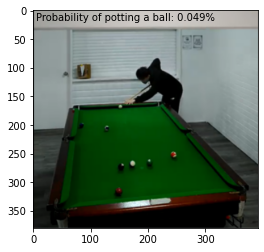

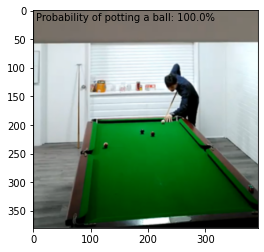

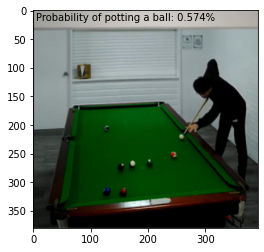

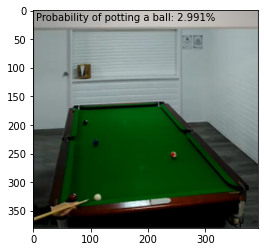

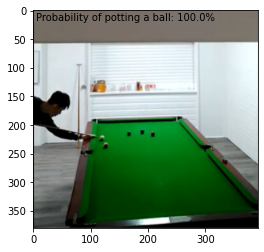

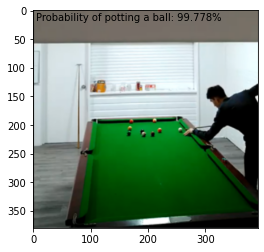

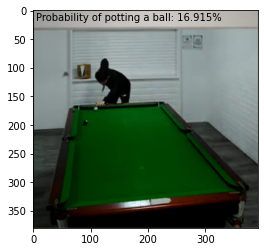

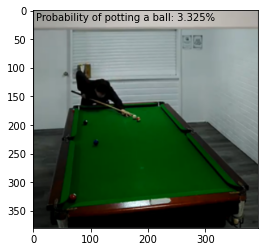

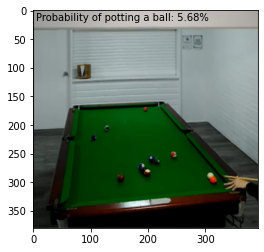

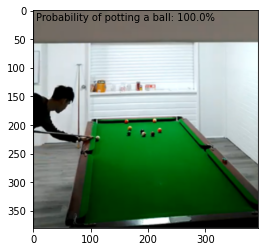

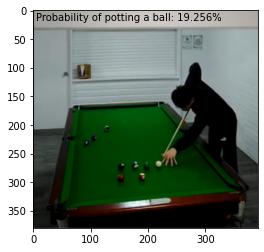

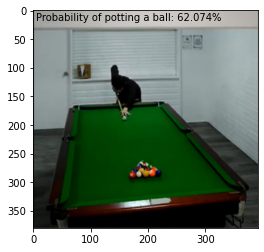

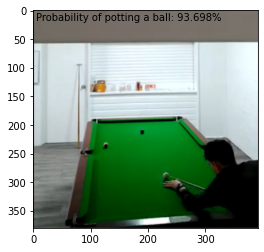

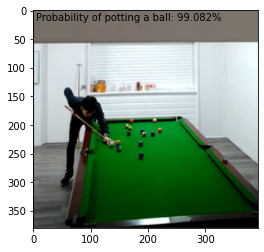

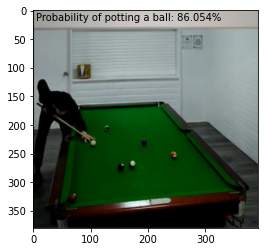

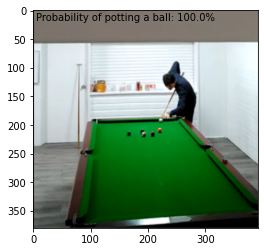

28


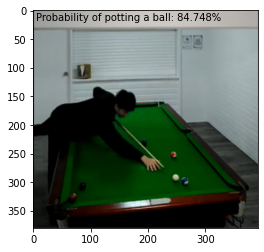

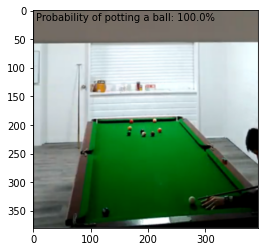

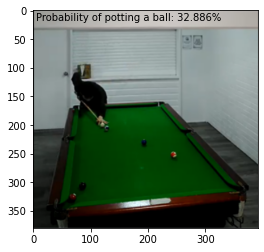

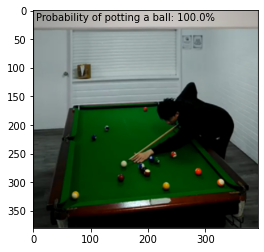

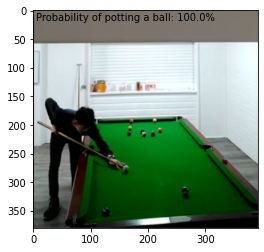

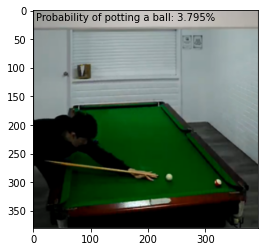

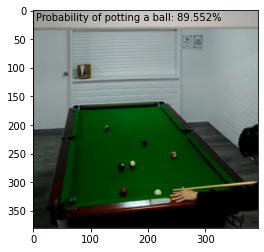

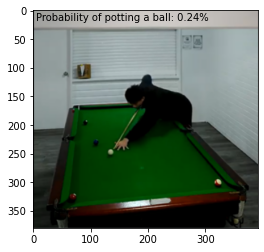

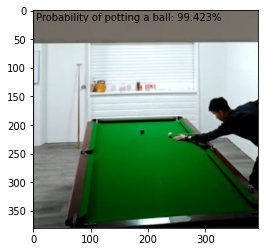

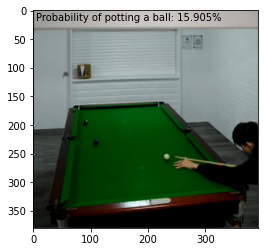

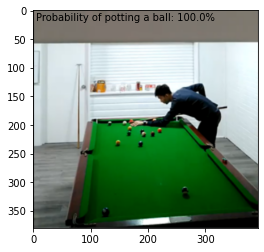

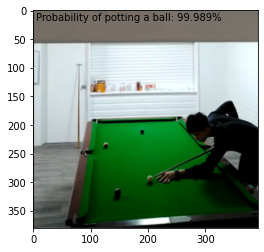

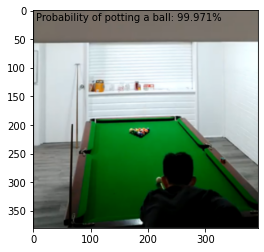

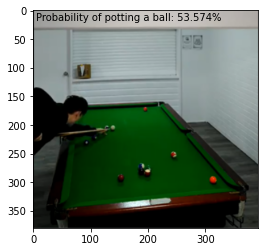

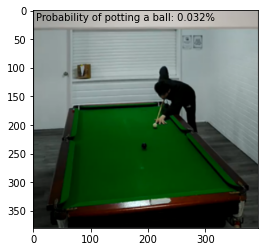

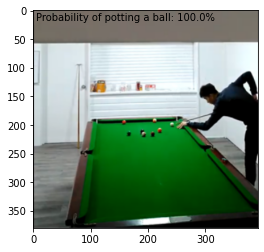

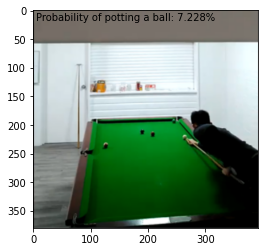

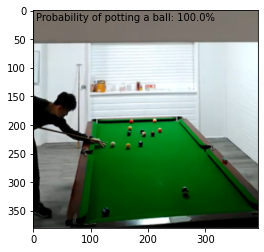

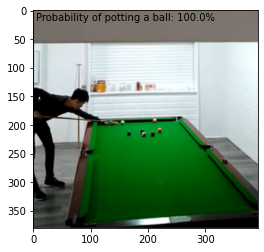

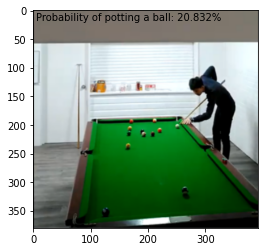

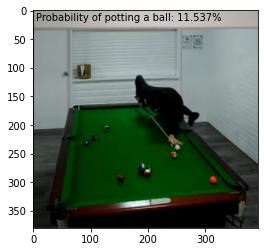

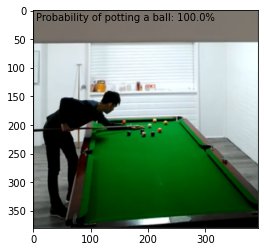

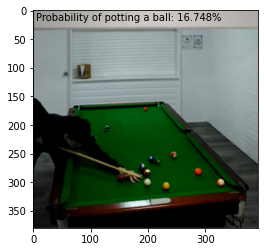

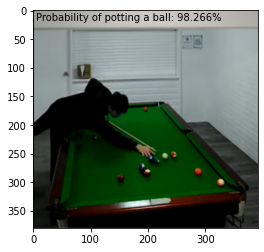

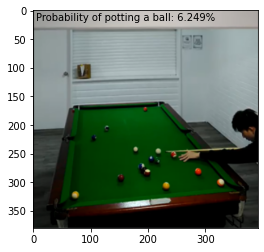

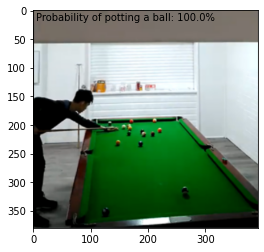

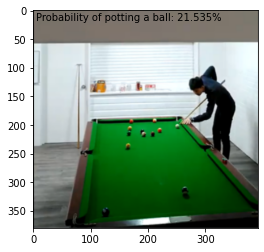

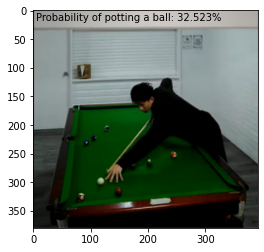

In [76]:
view_test_images_f = format_images_view("/content/drive/MyDrive/f.files")
test_images_f = format_images("/content/drive/MyDrive/f.files",False)
print(len(view_test_images_f))
for i in range(len(view_test_images_f)):   
    predict_test(view_test_images_f[i],test_images_f[i])
    
view_test_images_s = format_images_view("/content/drive/MyDrive/s.files")
test_images_s = format_images("/content/drive/MyDrive/s.files",False)
print(len(view_test_images_s))
for i in range(len(view_test_images_s)):   
    predict_test(view_test_images_s[i], test_images_s[i])  
  

In [77]:
print("For unsuccessful shots:")
val_accuracy_f = model.evaluate(np.array(test_images_f), np.zeros(len(test_images_f)))

print("For successful shots:")
val_accuracy_s = model.evaluate(np.array(test_images_s), np.ones(len(test_images_s)))

For unsuccessful shots:
1/1 [==============================] - 0s 214ms/step - loss: 5.8607 - accuracy: 0.4375
For successful shots:
1/1 [==============================] - 0s 60ms/step - loss: 1.2434 - accuracy: 0.5714
